In [385]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
sns.set(font_scale=1.5)

In [386]:
def rms(x):
    return np.sqrt(np.mean(x**2))

In [387]:
data = pd.read_csv ("Dati_Scania_status.csv")
data.shape

(404892, 19)

In [388]:
data = data.drop_duplicates().reset_index().drop(columns=['index'])
data.shape

(120269, 19)

## FEATURE ENGINEERING

In [389]:
### Aggregazione ogni 15 giorni
aggregation_step = 15

In [390]:
data = data.sort_values(by=['LicensePlate', 'CreatedDateTime'])
data['day'] = data['CreatedDateTime'].str[:10]

col_name = ['heading_mean', 'heading_min', 'heading_max', 'heading_std', 'heading_skew', 'heading_rms', 'heading_kurt',
           'altitude_mean', 'altitude_min', 'altitude_max', 'altitude_std', 'altitude_skew', 'altitude_rms', 'altitude_kurt',
           'speed_mean', 'speed_min', 'speed_max', 'speed_std', 'speed_skew', 'speed_rms', 'speed_kurt',
           'dist_mean', 'dist_min', 'dist_max', 'dist_std', 'dist_skew', 'dist_rms', 'dist_kurt',
           'fuel_mean', 'fuel_min', 'fuel_max', 'fuel_std', 'fuel_skew', 'fuel_rms', 'fuel_kurt',
           'fuel_1_mean', 'fuel_1_min', 'fuel_1_max', 'fuel_1_std', 'fuel_1_skew', 'fuel_1_rms', 'fuel_1_kurt',
           'cat_fuel_mean', 'cat_fuel_min', 'cat_fuel_max', 'cat_fuel_std', 'cat_fuel_skew', 'cat_fuel_rms', 'cat_fuel_kurt',
           'start_date', 'stop_date', 'Truck']

agg_data = []

for name in set(data['LicensePlate']):
    df_truck = data[data['LicensePlate']==name]
    days = sorted(set(df_truck['day']))
    for start, stop in zip(range(0, len(days)-aggregation_step), range(aggregation_step, len(days))):
        sublist = days[start:stop]
        df_range = df_truck[df_truck['day'].isin(sublist)]
        df_range = df_range[['Heading', 'Altitude', 'Speed', 'HRTotalVehicleDistance', 'EngineTotalFuelUsed',
                        'FuelLevel1', 'CatalystFuelLevel']]
        x=[]
        for c in df_range.columns:
            x.extend([df_range[c].mean(), df_range[c].min(), df_range[c].max(), df_range[c].std(), skew(df_range[c]), rms(df_range[c]), kurtosis(df_range[c])])
        
        x.extend([days[start], days[stop], name])
        agg_data.append(x)
        
df_tot = pd.DataFrame(agg_data, columns=col_name)
        

In [391]:
df_tot['start_date'] = pd.to_datetime(df_tot['start_date'], format='%Y-%m-%d')
df_tot['stop_date'] = pd.to_datetime(df_tot['stop_date'], format='%Y-%m-%d')

df_tot['day_distance'] = df_tot['dist_max'] - df_tot['dist_min']
df_tot['day_fuel_used'] = df_tot['fuel_max'] - df_tot['fuel_min']

df_tot = df_tot.drop(columns=['dist_max', 'dist_min', 'dist_std', 'dist_mean', 'dist_skew', 'dist_kurt', 'dist_rms',
                              'fuel_max', 'fuel_min', 'fuel_std', 'fuel_rms', 'fuel_kurt', 'fuel_skew', 'fuel_mean'])

df_tot

,heading_mean,heading_min,heading_max,heading_std,heading_skew,heading_rms,heading_kurt,altitude_mean,altitude_min,altitude_max,...,cat_fuel_max,cat_fuel_std,cat_fuel_skew,cat_fuel_rms,cat_fuel_kurt,start_date,stop_date,Truck,day_distance,day_fuel_used
0,157.111111,0.0,360.0,95.819448,0.309571,183.985008,-0.926755,101.529791,66.0,275.0,...,100,12.562930,-1.938601,90.196609,7.429073,2021-05-28,2021-06-15,FV906SK,943,475
1,156.053599,0.0,360.0,95.183590,0.348191,182.753296,-0.881718,100.465544,66.0,275.0,...,100,11.059899,-2.444075,91.750703,12.989082,2021-05-29,2021-06-16,FV906SK,968,495
2,156.216478,0.0,360.0,94.591345,0.337305,182.583285,-0.860882,100.890145,66.0,275.0,...,100,10.558899,-1.863518,91.376867,8.079464,2021-05-31,2021-06-17,FV906SK,909,463
3,155.433544,0.0,360.0,95.548804,0.348794,182.413583,-0.863255,102.045886,66.0,275.0,...,100,10.374297,-1.891151,91.203356,8.522371,2021-06-01,2021-06-18,FV906SK,953,465
4,153.506289,0.0,360.0,95.876454,0.349304,180.947567,-0.848603,101.845912,37.0,275.0,...,100,10.269642,-1.753304,90.469069,8.391982,2021-06-02,2021-06-19,FV906SK,957,461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,196.078920,1.0,358.0,105.992066,-0.232125,222.866765,-1.262994,50.580478,31.0,76.0,...,100,22.093417,-1.223952,85.712608,0.340671,2021-12-16,2022-01-12,FV908SK,1777,767
2017,197.065217,3.0,358.0,106.161627,-0.258929,223.815379,-1.252720,50.265010,31.0,76.0,...,100,16.228991,-1.058141,87.932422,0.018127,2021-12-17,2022-01-13,FV908SK,1802,777
2018,196.429480,3.0,359.0,105.295253,-0.246170,222.844955,-1.239258,50.415695,31.0,81.0,...,100,16.693417,-0.743896,85.531753,-0.634307,2021-12-20,2022-01-14,FV908SK,1773,757
2019,198.512739,3.0,359.0,104.996540,-0.257924,224.543710,-1.222392,50.213376,31.0,81.0,...,100,16.837788,-0.734062,85.714990,-0.663104,2021-12-21,2022-01-17,FV908SK,1779,761


## FEATURE SELECTION

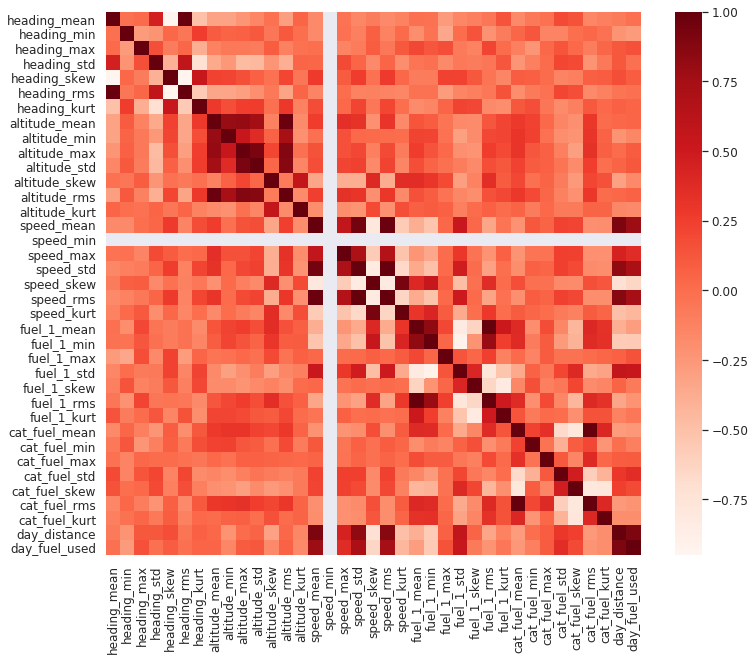

In [392]:
plt.figure(figsize=(12,10))

corr = df_tot.corr()

sns.set(font_scale=1.1)
sns.heatmap(corr, cmap=plt.cm.Reds)

In [393]:
corr = df_tot.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = corr.columns[columns]

df_sel = df_tot[selected_columns].copy()
df_sel['Truck'] = df_tot['Truck']
df_sel['start_date'] = df_tot['start_date']
df_sel['stop_date'] = df_tot['stop_date']

selected_columns

Index(['heading_mean', 'heading_min', 'heading_max', 'heading_std',
       'heading_skew', 'heading_kurt', 'altitude_mean', 'altitude_min',
       'altitude_max', 'altitude_skew', 'altitude_kurt', 'speed_mean',
       'speed_min', 'speed_max', 'speed_skew', 'fuel_1_mean', 'fuel_1_min',
       'fuel_1_max', 'fuel_1_std', 'fuel_1_skew', 'fuel_1_kurt',
       'cat_fuel_mean', 'cat_fuel_min', 'cat_fuel_max', 'cat_fuel_std',
       'cat_fuel_skew', 'cat_fuel_kurt'],
      dtype='object')

## MERGE CON FATTURE

In [394]:
df_fatture = pd.read_excel("fatture_filtered.xlsx")

# Scommentare per considerare solo un particolare gruppo di fatture 
df_fatture = df_fatture[df_fatture['Categoria componente']=='Impianto di lubrificazione motore']

df_fatture = df_fatture[['Targa', 'Data', 'label']]
df_fatture = df_fatture[df_fatture['Targa'].isin(set(df_sel['Truck']))]
len(df_fatture)

7

In [395]:
df_fatture

,Targa,Data,label
23,FV907SK,2021-05-28,0
24,FV907SK,2021-07-20,0
38,FV913SK,2021-09-24,0
45,FV914SK,2021-12-15,0
97,FZ330SC,2021-05-13,0
98,FZ330SC,2021-06-30,0
99,FZ330SC,2021-08-30,0


In [396]:
df_sel['label'] = 0
df_sel = df_sel[df_sel['Truck'].isin(set(df_fatture['Targa']))]
df_sel = df_sel.reset_index(drop=True)

def nearest(items, pivot):
    items_min = [y for y in items if y<=pivot]
    if len(items_min)>0:
        time = min(items_min, key=lambda x: pivot-x)
        return pd.to_datetime(time, format='%Y-%m-%d')
    else: 
        return -1

In [397]:
## Parametro da cambiare per settare l'horizon di predizione
h = 10

In [398]:
from datetime import datetime, timedelta

df_fatture = df_fatture.reset_index(drop=True)
for i in range(df_fatture.shape[0]):
    t = df_fatture['Targa'][i]
    d = df_fatture['Data'][i]
    
    df_truck = df_sel[df_sel['Truck'] == t]
    min_ind = nearest(df_truck['stop_date'], d)
    if(min_ind!=-1):
        df_sel.loc[(df_sel['Truck']==t) & (df_sel['stop_date'] == min_ind), 'label'] = 1
        for i in range(1, h):
            df_sel.loc[(df_sel['Truck']==t) & (df_sel['stop_date'] == min_ind-timedelta(days=i)), 'label'] = 1
    
df_sel['label'].value_counts()

0    581
1     37
Name: label, dtype: int64

### PREDICTIVE MODEL

In [399]:
df_exp = df_sel.drop(columns=['Truck', 'start_date', 'stop_date'])
df_exp

,heading_mean,heading_min,heading_max,heading_std,heading_skew,heading_kurt,altitude_mean,altitude_min,altitude_max,altitude_skew,...,fuel_1_std,fuel_1_skew,fuel_1_kurt,cat_fuel_mean,cat_fuel_min,cat_fuel_max,cat_fuel_std,cat_fuel_skew,cat_fuel_kurt,label
0,189.053872,1.0,358.0,109.299092,-0.165253,-1.309857,50.812570,-20.0,428.0,11.387315,...,18.120260,-0.249182,-0.763190,84.377104,0,100,15.732786,-1.008805,0.945963,0
1,188.441886,1.0,358.0,109.080736,-0.155270,-1.301440,50.411184,-20.0,428.0,11.648348,...,18.214577,-0.276136,-0.775974,84.237939,0,100,15.496587,-1.009856,1.054515,0
2,189.992537,1.0,358.0,109.865023,-0.186901,-1.299114,50.410448,-20.0,428.0,11.649149,...,18.082460,-0.207976,-0.792144,83.583156,0,100,15.469597,-0.880163,0.825507,0
3,190.098291,0.0,358.0,109.780885,-0.182057,-1.300526,50.708333,-20.0,428.0,11.640579,...,19.127275,-0.259475,-0.894902,82.607906,0,100,16.281189,-0.720216,0.137092,1
4,191.011702,0.0,358.0,108.607670,-0.197438,-1.260604,50.432979,-20.0,428.0,12.752572,...,17.510004,-0.333754,-0.793079,84.624468,0,100,16.407758,-0.948762,0.454017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,201.839304,3.0,359.0,108.794916,-0.306390,-1.262509,46.243603,1.0,98.0,0.667170,...,20.833577,-0.107549,-1.031174,78.670420,46,100,17.611643,-0.169117,-1.305193,0
614,203.443872,2.0,359.0,109.074748,-0.337335,-1.247558,46.323378,1.0,98.0,0.665348,...,21.077872,-0.081040,-1.041421,80.118435,46,100,18.460808,-0.277105,-1.414344,0
615,201.234021,1.0,359.0,109.078351,-0.303921,-1.262927,46.248454,1.0,98.0,0.688712,...,21.163110,-0.157829,-1.051588,82.363918,46,100,18.842417,-0.517153,-1.299598,0
616,196.240854,1.0,359.0,110.288616,-0.247312,-1.321902,46.182927,1.0,98.0,0.696305,...,20.737266,-0.178380,-0.944426,84.314024,46,100,18.526821,-0.738762,-0.999217,0


In [400]:
Y = df_exp['label'].copy()
X = df_exp.drop(columns=['label'])

In [401]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')

model = XGBClassifier()
loo = LeaveOneOut()
pred = cross_val_predict(model,X,Y,cv=50)

print()
print(classification_report(Y, pred, target_names=['0', '1']))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       581
           1       0.68      0.68      0.68        37

    accuracy                           0.96       618
   macro avg       0.83      0.83      0.83       618
weighted avg       0.96      0.96      0.96       618



### Prediction with only one trucks ###

In [402]:
truck = 'FZ330SC'

df_truck = df_sel[df_sel['Truck']== truck]
df_truck = df_truck.drop(columns=['Truck', 'start_date', 'stop_date'])
df_truck['label'].value_counts()

0    121
1     14
Name: label, dtype: int64

In [403]:
Y = df_truck['label'].copy()
X = df_truck.drop(columns=['label'])

In [404]:
model = XGBClassifier()
loo = LeaveOneOut()
pred = cross_val_predict(model,X,Y,cv=loo)

print()
print(classification_report(Y, pred, target_names=['0', '1']))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       121
           1       0.77      0.71      0.74        14

    accuracy                           0.95       135
   macro avg       0.87      0.84      0.86       135
weighted avg       0.95      0.95      0.95       135



### One truck for training and others for test

In [405]:
df_sel[df_sel['label']==1]['Truck'].value_counts()

FZ330SC    14
FV914SK     8
FV913SK     8
FV907SK     7
Name: Truck, dtype: int64

In [406]:
df_train = df_sel[df_sel['Truck'].isin(['FZ330SC'])]
df_train = df_train.drop(columns=['Truck', 'start_date', 'stop_date'])

In [407]:
df_test = df_sel[df_sel['Truck'].isin(['FV907SK'])]
df_test = df_test.drop(columns=['Truck', 'start_date', 'stop_date'])

In [408]:
Y_train = df_train['label'].copy()
X_train = df_train.drop(columns=['label'])

Y_test = df_test['label'].copy()
X_test = df_test.drop(columns=['label'])

In [409]:
model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       127
           1       0.08      0.14      0.11         7

    accuracy                           0.87       134
   macro avg       0.52      0.53      0.52       134
weighted avg       0.91      0.87      0.89       134

